# Part 4

Jon Messier

3/16/2021


For part 4 of the project, you will be using your MySQL database from part 3 to answer meaningful questions for your stakeholder. They want you to use your hypothesis testing and statistics knowledge to answer 3 questions about what makes a successful movie.

---

## Questions to Answer
- [ ] The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?
    - [ ] They want you to perform a statistical test to get a mathematically-supported answer.
    - [ ] They want you to report if you found a significant difference between ratings.
        - [ ] If so, what was the p-value of your analysis?
        - [ ] And which rating earns the most revenue?
    - They want you to prepare a visualization that supports your finding.



- [ ] It is then up to you to think of 2 additional hypotheses to test that your stakeholder may want to know.

Some example hypotheses you could test:

- [ ] Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
- [ ] Do movies released in 2020 earn less revenue than movies released in 2018?
  - [ ] How do the years compare for movie ratings?
  - [ ]  Do some movie genres earn more revenue than others?
  - [ ] Are some genres higher rated than others? etc.

## Specifications
### Your Data
A critical first step for this assignment will be to retrieve additional movie data to add to your SQL database.
 - [ ]   You will want to use the TMDB API again and extract data for additional years.
 - [ ]  You may want to review the optional lesson from Week 1 on "Using glob to Load Many Files" to load and combine all of your API results for each year.

 - [ ]  However, trying to extract the TMDB data for all movies from 2000-2022 could take >24 hours!
 - [ ]   To address this issue, you should EITHER:
   - [ ]     Define a smaller (but logical) period of time to use for your analyses (e.g. last 10 years, 2010-2019 (pre-pandemic, etc).
   - [ ]    OR coordinate with cohort-mates and divide the API calls so that you can all download the data for a smaller number of years and then share your downloaded JSON data.
   
## Deliverables
- [ ]  You should use the same project repository you have been using for Parts 1-3 (for your portfolio).
- [ ]  Create a new notebook in your project repository just for the hypothesis testing (like "Part 4 - Hypothesis Testing.ipynb")
- [ ] Make sure the results and visualization for all 3 hypotheses are in your notebook.

# Class Imports

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy

import pymysql
pymysql.install_as_MySQLdb()

from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists

# Load Data
Use the TMDB json files in '/Data' to create our data frame

In [2]:
import glob
q = "Data/tmdb_api_results_*.json"
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files[:5]

['Data\\tmdb_api_results_2000.json',
 'Data\\tmdb_api_results_2001.json',
 'Data\\tmdb_api_results_2002.json',
 'Data\\tmdb_api_results_2003.json',
 'Data\\tmdb_api_results_2004.json']

In [3]:
## Loading and Concatenating the list of dfs with 1 line
tmdb = pd.concat([pd.read_json(file) for file in chunked_files])
tmdb.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,
2,tt0113092,0.0,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,
3,tt0116391,0.0,None,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,None,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.115,2133.0,PG


In [4]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27967 entries, 0 to 3891
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                27967 non-null  object 
 1   adult                  27946 non-null  float64
 2   backdrop_path          19967 non-null  object 
 3   belongs_to_collection  1709 non-null   object 
 4   budget                 27946 non-null  float64
 5   genres                 27946 non-null  object 
 6   homepage               27946 non-null  object 
 7   id                     27946 non-null  float64
 8   original_language      27946 non-null  object 
 9   original_title         27946 non-null  object 
 10  overview               27946 non-null  object 
 11  popularity             27946 non-null  float64
 12  poster_path            26829 non-null  object 
 13  production_companies   27946 non-null  object 
 14  production_countries   27946 non-null  object 
 15  rel

# Custom Functions

# Q1. MPAA v. Revenue

For $\alpha=0.05$:

 $H_0$(Null Hypothesis) There is no statistical difference in the MPAA rating (`certification`) and `revenue`.  $p<\alpha$
 
 $H_A$(Alternative Hypothesis) There is a significant difference in the MPAA rating (`certification`) and `revenue`.  $p>\alpha$
 
## Define test
- Type of Data - Revenue - numeric
- How many groups - Certification (G, PG, PG-13, R, NC-17, NR) = 6
- Which test is appropriate? ANOVA, Tukey, Kruskal-Wallis?

## Assumptions
1. No Significant Outliers
2. Equal Variance
3. Normality

## Explore/Clean data

In [5]:
df = tmdb[['certification','revenue']]

In [6]:
# Duplicates?
df.duplicated().sum()

25036

In [7]:
#drop duplicated entries
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
#How many categories do we have
df['certification'].value_counts()

R          820
PG-13      570
           488
PG         219
NR         104
G           50
NC-17        7
Unrated      1
-            1
Name: certification, dtype: int64

For this hypthesis testing, I will drop the `certification = NaN, Unrated, and "-"` values.  These values are:
1. Impossible to qualify with out looking at each of the 10046 entries individually in the case of NaN
2. Statistically insignificant in the case of `Unrated`, `NC-17` and `"-"`

In [9]:
df = df.dropna(axis=0,subset="certification")
df = df[(df['certification']!='Unrated') & (df['certification']!='-') & (df['certification']!='NC-17') & (df['certification']!='')]
df['certification'].value_counts()

R        820
PG-13    570
PG       219
NR       104
G         50
Name: certification, dtype: int64

## Exploratory Visual


<AxesSubplot: xlabel='certification', ylabel='revenue'>

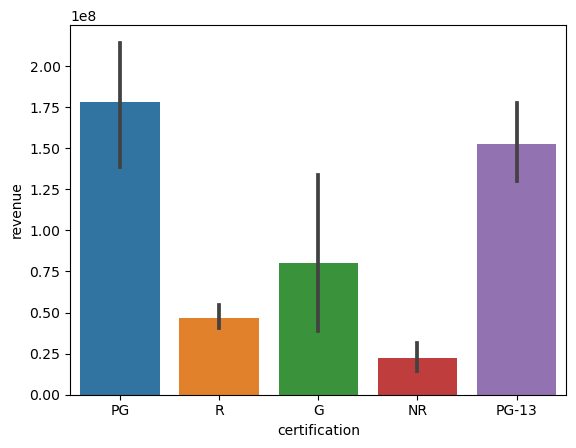

In [10]:
sns.barplot(data = df, x='certification', y= 'revenue')

In [38]:
#Divide into groups to make it easier to work with in the future
groups ={}
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'NR', 'PG-13'])

## Test Assumption of no significant outliers

In [39]:
for i, data in groups.items():
    zscores = stats.zscore(data)
    outliers = abs(zscores)>3
    print(f'For certification = {i}, there are {np.sum(outliers)} outliers')
    groups[i] = groups[i][(np.abs(stats.zscore(groups[i])) < 3)]
    print(f'Outliers have been removed')

For certification = PG, there are 6 outliers
Outliers have been removed
For certification = R, there are 21 outliers
Outliers have been removed
For certification = G, there are 1 outliers
Outliers have been removed
For certification = NR, there are 3 outliers
Outliers have been removed
For certification = PG-13, there are 15 outliers
Outliers have been removed


## Test Assumption of Normality
**Use:**  `scipy.stats.normaltest`. From the docs: 
"This function tests the null hypothesis that a sample comes from a normal distribution."

A p-value less than 0.05 says our distribution is significantly different than a normal distribution.

In [13]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,213.0,4.159352e-25,112.278536
R,799.0,9.568299e-96,437.579427
G,49.0,2.931453e-12,53.111046
NR,101.0,3.578362e-12,52.712232
PG-13,555.0,6.041824e-63,286.528310


Our p-values for all ratings is $< 0.5$ which indicates we must reject the null hypothesis.  This means our data is not normally distributed. **However**, since our sample sizes for each group is >30 we can use the Central Limit Theorem to proceed without meeting this assumption

## Test Assumption of Equal Variance
Use the Levene's Test

For Levene's test, the null hypothesis is: All samples are from populations with equal variances.

In [14]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=47.2216847720513, pvalue=1.065299202105656e-37)

## Test Q1 hypothesis

From our assumptions we see that we cannot reject the null hypothesis for Normality, and Equal Variance.  This implies we should use a non-parametric hypothesis test.  In this case we use [Kruskal-Wallis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html).

From the Scipy documentation a KW test the null hypothesis is defined by:

*The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.*

In [15]:
# Kriskal-Wallis test
stats.kruskal(*groups.values())

KruskalResult(statistic=230.3177385874439, pvalue=1.1276930384176964e-48)

Since $p<\alpha$, we reject the null hypothesis that the median revenue for all ratings is equal.

Let's plot the distribution of revenue and the medians for each group to visualize the comparison

### ----> NEED HELP MAKING THIS PLOT LOOK GOOD
- [ ] Why is it showing the data twice?


 Rating PG Median Revenue = 146406835.93
 Rating R Median Revenue = 33581179.51
 Rating G Median Revenue = 59963729.86
 Rating NR Median Revenue = 16301523.29
 Rating PG-13 Median Revenue = 116912980.35


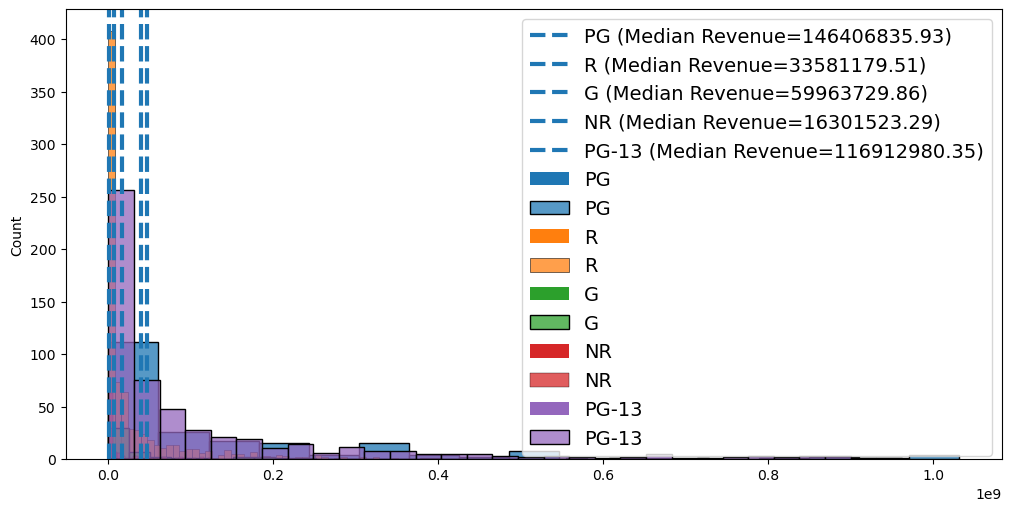

In [46]:
fig, ax = plt.subplots(figsize= (10,5), constrained_layout=True);

for i in groups.keys():
    print(f" Rating {i} Median Revenue = {np.mean(groups[i]):.2f}")
    ax  = sns.histplot(data = groups[i].values, label=i,ax=ax)
    ax.axvline(np.median(groups[i]), ls='--',lw=3, 
           label=f"{i} (Median Revenue={np.mean(groups[i]):.2f})");
    ax.legend(prop={"size":14}, loc='upper right')

### Highest Median Revenue
- [x] Evaluation: Why do we care if the median is different?
 - When your distribution is skewed enough, the mean is strongly affected by changes far out in the distribution’s tail whereas the median continues to more closely reflect the center of the distribution. For these two distributions, a random sample of 100 from each distribution produces means that are significantly different, but medians that are not significantly different.
---
- The PG-rating has the highest median revenue.  
- Followed by PG-13

# Q2. Median Budget vs Revenue
Does spending more than the median budget generate higher revenue?

For $\alpha=0.05$:

 $H_0$(Null Hypothesis) There is no statistical difference in the budget and `revenue`.  $p<\alpha$
 
 $H_A$(Alternative Hypothesis) There is a significant difference between the `budget` and `revenue`.  $p>\alpha$
 
## Define test
- Type of Data - Revenue - numeric
- How many groups - 2 (above/below median budget)
- Which test is appropriate? ANOVA, Tukey, Kruskal-Wallis?

## Assumptions
1. No Significant Outliers
2. Equal Variance
3. Normality

## Load/Clean/Group data
- [x] Load `budget` and `revenue`
- [x] Remove duplicates
- [x] Drop NaN and 0-values
- [x] Calculate `mean` budget and divide into 2 groups `gt:"greater than"`, `lt:"less than"`


In [84]:
df = tmdb[["budget", "revenue"]]
df.head()

,budget,revenue
0,NaN,NaN
1,10000000.0,0.0
2,0.0,0.0
3,0.0,0.0
4,150000.0,12854953.0


In [85]:
df.duplicated().sum()

24378

In [86]:
#drop duplicated entries
df = df.drop_duplicates()
df.duplicated().sum()

0

In [87]:
#Check for NaN values
df.isna().sum()

budget     1
revenue    1
dtype: int64

In [89]:
#Drop NaN values
df.dropna(inplace=True)
df.isna().sum()

budget     0
revenue    0
dtype: int64

In [95]:
#Drop budget=0 OR revenue = 0
df = df[(df["budget"]!=0)&(df["revenue"]!=0)]

In [96]:
gt = df[df["budget"]>=np.mean(df["budget"])]

In [97]:
lt = df[df["budget"]<np.mean(df["budget"])]

In [98]:
df["budget_gt_median"] = df["budget"]>=np.mean(df["budget"])

## Visualize data

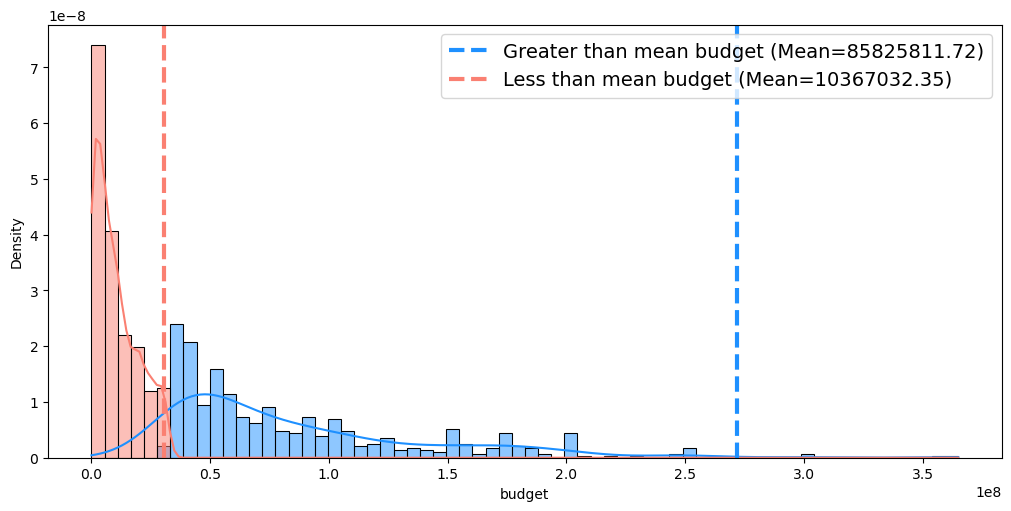

In [109]:
budget_palette={'gt':'dodgerblue', "lt":'salmon', True:'dodgerblue', False:'salmon'}
fig, ax = plt.subplots(figsize= (10,5), 
                                constrained_layout=True)


# Histogram
ax = sns.histplot(data=df, x='budget',fill=True, hue = "budget_gt_median", kde=True,
                  stat='density',common_norm=False,palette = budget_palette, ax=ax)

ax.axvline(np.mean(gt['revenue']), ls='--',lw=3, 
           label=f"Greater than mean budget (Mean={np.mean(gt['budget']):.2f})",
          color=budget_palette['gt'])

ax.axvline(np.mean(lt['revenue']), ls='--', lw=3, 
           label=f"Less than mean budget (Mean={np.mean(lt['budget']):.2f})",
          color=budget_palette['lt'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])

## Test Assumption of no significant outliers

In [110]:
zscores = stats.zscore(gt)
outliers = abs(zscores)>3
np.sum(outliers)

budget      5
revenue    11
dtype: int64

In [111]:
gt = gt[(np.abs(stats.zscore(gt)) < 3)]

In [112]:
zscores = stats.zscore(gt)
outliers = abs(zscores)>3
np.sum(outliers)

budget     0
revenue    0
dtype: int64

In [113]:
zscores = stats.zscore(lt)
outliers = abs(zscores)>3
np.sum(outliers)

budget      0
revenue    26
dtype: int64

In [115]:
lt = lt[(np.abs(stats.zscore(lt)) < 3)]

In [116]:
zscores = stats.zscore(lt)
outliers = abs(zscores)>3
np.sum(outliers)

budget     0
revenue    0
dtype: int64

## Test Assumption of Normality
**Use:**  `scipy.stats.normaltest`. From the docs: 
"This function tests the null hypothesis that a sample comes from a normal distribution."

A p-value less than 0.05 says our distribution is significantly different than a normal distribution.

In [117]:
stat, p = stats.normaltest(gt)

In [119]:
print(f'Stat {stat}, p-value {p}')

Stat [nan nan], p-value [nan nan]


## Test Assumption of Equal Variance


## Test Q2 hypothesis
